### Let's download the Data

In [43]:
import os
import time
from datetime import datetime

import numpy as np
import scipy
import yfinance as yf

In [27]:
COMPANY_TICKERS = {
    "3i": "III",
    "Admiral Group": "ADM",
    "Airtel Africa": "AAF",
    "Alliance Witan": "ALW",
    "Anglo American plc": "AAL",
    "Antofagasta plc": "ANTO",
    "Ashtead Group": "AHT",
    "Associated British Foods": "ABF",
    "AstraZeneca": "AZN",
    "Auto Trader Group": "AUTO",
    "Aviva": "AV",
    "Babcock International": "BAB",
    "BAE Systems": "BA",
    "Barclays": "BARC",
    "Barratt Redrow": "BTRW",
    "Beazley": "BEZ",
    "Berkeley Group Holdings": "BKG",
    "BP": "BP",
    "British American Tobacco": "BATS",
    "BT Group": "BT-A",
    "Bunzl": "BNZL",
    "Burberry Group": "BRBY",
    "Centrica": "CNA",
    "Coca-Cola Europacific Partners": "CCEP",
    "Coca-Cola HBC": "CCH",
    "Compass Group": "CPG",
    "Convatec": "CTEC",
    "Croda International": "CRDA",
    "DCC plc": "DCC",
    "Diageo": "DGE",
    "Diploma": "DPLM",
    "Endeavour Mining": "EDV",
    "Entain": "ENT",
    "EasyJet": "EZJ",
    "Experian": "EXPN",
    "F & C Investment Trust": "FCIT",
    "Fresnillo plc": "FRES",
    "Games Workshop": "GAW",
    "Glencore": "GLEN",
    "GSK plc": "GSK",
    "Haleon": "HLN",
    "Halma plc": "HLMA",
    "Hikma Pharmaceuticals": "HIK",
    "Hiscox": "HSX",
    "Howdens Joinery": "HWDN",
    "HSBC": "HSBA",
    "ICG": "ICG",
    "IHG Hotels & Resorts": "IHG",
    "IMI": "IMI",
    "Imperial Brands": "IMB",
    "Informa": "INF",
    "International Airlines Group": "IAG",
    "Intertek": "ITRK",
    "JD Sports": "JD",
    "Kingfisher plc": "KGF",
    "Land Securities": "LAND",
    "Legal & General": "LGEN",
    "Lloyds Banking Group": "LLOY",
    "LondonMetric Property": "LMP",
    "London Stock Exchange Group": "LSEG",
    "M&G": "MNG",
    "Marks & Spencer": "MKS",
    "Melrose Industries": "MRO",
    "Metlen Energy & Metals": "MTLN",
    "Mondi": "MNDI",
    "National Grid plc": "NG",
    "NatWest Group": "NWG",
    "Next plc": "NXT",
    "Pearson plc": "PSON",
    "Pershing Square Holdings": "PSH",
    "Persimmon": "PSN",
    "Phoenix Group": "PHNX",
    "Polar Capital Technology Trust": "PCT",
    "Prudential plc": "PRU",
    "Reckitt": "RKT",
    "RELX": "REL",
    "Rentokil Initial": "RTO",
    "Rightmove": "RMV",
    "Rio Tinto": "RIO",
    "Rolls-Royce Holdings": "RR",
    "Sage Group": "SGE",
    "Sainsbury's": "SBRY",
    "Schroders": "SDR",
    "Scottish Mortgage Investment Trust": "SMT",
    "Segro": "SGRO",
    "Severn Trent": "SVT",
    "Shell plc": "SHEL",
    "Smiths Group": "SMIN",
    "Smith & Nephew": "SN",
    "Spirax Group": "SPX",
    "SSE plc": "SSE",
    "Standard Chartered": "STAN",
    "St. James's Place": "STJ",
    "Tesco": "TSCO",
    "Unilever": "ULVR",
    "United Utilities": "UU",
    "Vodafone Group": "VOD",
    "Weir Group": "WEIR",
    "Whitbread": "WTB",
    "WPP": "WPP",
}

# 2. Преобразуем тикеры в формат Yahoo Finance (добавляем .L, заменяем дефисы)
yahoo_symbols = {}
for name, t in COMPANY_TICKERS.items():
    yf_ticker = t.replace("-", ".") + ".L"
    yahoo_symbols[name] = yf_ticker

# 3. Папка для сохранения
DATA_DIR = "assets_data"
os.makedirs(DATA_DIR, exist_ok=True)

# 4. Параметры периода (можно менять под себя)
START_DATE = "2000-01-01"  # или любой другой
END_DATE = datetime.today().strftime("%Y-%m-%d")
INTERVAL = "1wk"  # недельные данные

# 5. Загрузка и сохранение
for company, ticker in yahoo_symbols.items():
    print(f"Downloading {company} ({ticker})...")
    try:
        data = yf.download(
            ticker,
            start=START_DATE,
            end=END_DATE,
            interval=INTERVAL,
            progress=False,
        )
        if data.empty:
            print(f"  Warning: no data for {ticker}")
            continue

        # имя файла: TICKER.csv (без суффикса .L в имени, опционально)
        base_ticker = ticker.replace(".L", "")
        file_path = os.path.join(DATA_DIR, f"{base_ticker}.csv")
        data.to_csv(file_path)
        print(f"  Saved to {file_path}")
        time.sleep(0.2)  # лёгкий sleep, чтобы не спамить запросами
    except Exception as e:
        print(f"  Error for {ticker}: {e}")

INDEX_TICKER = "^FTSE"

print(f"Downloading index FTSE 100 ({INDEX_TICKER})...")
idx = yf.download(
    INDEX_TICKER,
    start=START_DATE,
    end=END_DATE,
    interval=INTERVAL,
    progress=False,
)

if not idx.empty:
    index_path = os.path.join(DATA_DIR, "FTSE_INDEX.csv")
    idx.to_csv(index_path)
    print(f"  Saved index to {index_path}")
else:
    print("  Warning: no data for index")

/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/III.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/ADM.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/AAF.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/ALW.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/AAL.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/ANTO.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/AHT.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/ABF.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/AZN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/AUTO.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/AV.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BAB.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BA.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BARC.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BTRW.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BEZ.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BKG.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BP.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BATS.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(

1 Failed download:
['BT.A.L']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BNZL.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/BRBY.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/CNA.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/CCEP.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/CCH.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/CPG.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/CTEC.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/CRDA.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/DCC.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/DGE.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/DPLM.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/EDV.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/ENT.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/EZJ.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/EXPN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/FCIT.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/FRES.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/GAW.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/GLEN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/GSK.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/HLN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/HLMA.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/HIK.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/HSX.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/HWDN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/HSBA.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/ICG.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/IHG.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/IMI.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/IMB.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/INF.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/IAG.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/ITRK.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/JD.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/KGF.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/LAND.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/LGEN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/LLOY.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/LMP.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/LSEG.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/MNG.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/MKS.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/MRO.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/MTLN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/MNDI.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/NG.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/NWG.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/NXT.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/PSON.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/PSH.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/PSN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/PHNX.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/PCT.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/PRU.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/RKT.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/REL.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/RTO.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/RMV.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/RIO.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/RR.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SGE.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SBRY.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SDR.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SMT.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SGRO.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SVT.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SHEL.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SMIN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(

1 Failed download:
['SN.L']: Timeout('Failed to perform, curl: (28) Connection timed out after 10000 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SPX.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/SSE.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/STAN.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/STJ.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(

1 Failed download:
['TSCO.L']: Timeout('Failed to perform, curl: (28) Connection timed out after 10000 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(



1 Failed download:
['ULVR.L']: Timeout('Failed to perform, curl: (28) Connection timed out after 10000 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/UU.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/VOD.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  Saved to assets_data/WEIR.csv


/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(

1 Failed download:
['WTB.L']: Timeout('Failed to perform, curl: (28) Connection timed out after 10000 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
/tmp/ipykernel_974/91252085.py:129: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(



1 Failed download:
['WPP.L']: Timeout('Failed to perform, curl: (28) Connection timed out after 10000 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
/tmp/ipykernel_974/91252085.py:153: FutureWarning: YF.download() has changed argument auto_adjust default to True
  idx = yf.download(


  Saved index to assets_data/FTSE_INDEX.csv


In [28]:
import os
import pandas as pd
import yfinance as yf

DATA_DIR = "assets_data"


# ---------- 1. Загрузка доходностей акций из твоих CSV ----------

def load_assets_returns_from_custom_csv(data_dir=DATA_DIR):
    """
    Ожидаемый формат файла (по твоему скрину):

    row 0: Price, Close, High, Low, Open, Volume
    row 1: Ticker, AAL.L, AAL.L, AAL.L, AAL.L, AAL.L
    row 2: Date, Date, Date, Date, Date, Date
    row 3+: 2000-01-01, 1137..., 1142..., 1037..., 1093..., 26405670, ...

    Берём колонку Close, считаем недельные доходности.
    """
    all_rets = []

    for fname in os.listdir(data_dir):
        if not fname.lower().endswith(".csv"):
            continue

        path = os.path.join(data_dir, fname)
        df_raw = pd.read_csv(path, header=None)

        # 0‑я строка: имена колонок
        col_names = df_raw.iloc[0].tolist()
        df = df_raw.iloc[1:].copy()
        df.columns = col_names

        # 1‑я строка после сдвига: тикеры
        ticker = str(df.iloc[0]["Close"]).strip()  # напр. "AAL.L"

        # 2‑я строка после сдвига: "Date"
        # оставляем только строки ниже неё
        df = df.iloc[2:].copy()

        # колонка с датой теперь в "Price"
        df["Date"] = pd.to_datetime(df["Price"], errors="coerce")
        df = df.dropna(subset=["Date"])
        df = df.set_index("Date").sort_index()

        # цена закрытия
        price = pd.to_numeric(df["Close"], errors="coerce").dropna()

        ret = price.pct_change().rename(ticker.replace(".L", ""))
        all_rets.append(ret)

    R = pd.concat(all_rets, axis=1)
    R = R.dropna(how="all")
    return R


R_assets = load_assets_returns_from_custom_csv(DATA_DIR)


# ---------- 2. Индекс FTSE 100 ----------

def load_index_returns(start=None, end=None, interval="1wk"):
    """
    Недельные доходности индекса FTSE 100.
    """
    idx = yf.download(
        "^FTSE",
        start=start,
        end=end,
        interval=interval,
        progress=False,
    )

    if idx.empty:
        raise ValueError("Не удалось скачать данные по индексу FTSE 100")

    # если это DataFrame с MultiIndex по колонкам, берём один столбец
    if isinstance(idx, pd.DataFrame):
        if "Adj Close" in idx.columns:
            col = "Adj Close"
        else:
            col = "Close"
        s = idx[col]
    else:
        # на всякий случай, если вдруг придёт Series
        s = idx

    # гарантируем Series с корректным индексом дат
    # print(s.values[:, 0])
    s = pd.Series(s.values[:, 0], index=idx.index, name="price_ftse")

    r_b = s.pct_change()
    r_b.name = "FTSE100"
    r_b = r_b.dropna()
    return r_b


start_date = R_assets.index.min()
end_date = R_assets.index.max()
R_B = load_index_returns(start=start_date, end=end_date, interval="1wk")

# ---------- 3. Совместные даты и центрирование ----------

common_idx = R_assets.index.intersection(R_B.index)

R_assets = R_assets.loc[common_idx].sort_index()
R_B = R_B.loc[common_idx].sort_index()

R_assets = R_assets.dropna(axis=1, thresh=int(0.8 * len(R_assets)))
R_assets = R_assets.fillna(0.0)

R_B_centered = R_B - R_B.mean()
R_assets_centered = R_assets - R_assets.mean(axis=0)

X = R_assets_centered.values
y = R_B_centered.values

print("R_assets shape:", R_assets.shape)
print("R_B shape:", R_B.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)


/tmp/ipykernel_974/904857850.py:64: FutureWarning: YF.download() has changed argument auto_adjust default to True
  idx = yf.download(


R_assets shape: (1349, 12)
R_B shape: (1349,)
X shape: (1349, 12)
y shape: (1349,)


In [29]:
A_train = np.array(X)
b_train = np.array(y)

In [38]:
n = A_train.shape[0]
d_train = A_train.shape[1]
eigenvalues_a_train = np.linalg.eigvalsh(A_train @ A_train.T)
L = np.max(eigenvalues_a_train) / (4 * n)

In [36]:
def sigmoid(x):
    """
    Вычисляет сигмоидную функцию.

    Параметры:
        x (np.array): Входное значение.

    Возвращает:
        sigmoid (np.array) Значение сигмоидной функции для входных данных.
    """
    return scipy.special.expit(x)


def loss(x, A=A_train, b=b_train, lambda_value=L / 1000):
    """
    Вычисляет значение функции потерь.

    Параметры:
        x (np.array): Вектор параметров модели.
        A (np.array): Матрица признаков обучающей выборки.
        b (np.array): Вектор меток обучающей выборки.
        lambda_value (float): Параметр регуляризации.

    Возвращает:
        loss (float): Значение функции потерь.
    """

    loss = -np.mean(b * np.log(sigmoid(A @ x)) + (1 - b) * np.log(1 - sigmoid(A @ x))) + lambda_value / 2 * np.sum(
        x ** 2)

    return loss


def grad(x, A=A_train, b=b_train, lambda_value=L / 1000):
    """
    Вычисляет градиент функции потерь.

    Параметры:
        x (np.array): Вектор параметров модели.
        A (np.array): Матрица признаков обучающей выборки.
        b (np.array): Вектор меток обучающей выборки.
        lambda_value (float): Параметр регуляризации.

    Возвращает:
        loss (np.array): Градиент функции потерь.
    """
    n = A_train.shape[0]
    gradient = 1 / n * (2 * A_train.T @ (A_train @ x - b_train)) + 2 * lambda_value * x

    return gradient


def hess(x, A=A_train, b=b_train, lambda_value=L / 1000):
    """
    Вычисляет гессиан функции потерь.

    Параметры:
        x (np.array): Вектор параметров модели
        A (np.array): Матрица признаков обучающей выборки
        b (np.array): Вектор меток обучающей выборки
        lambda_value (float): Параметр регуляризации

    Возвращает:
        hess (np.array): Гессиан функции потерь.
    """

    g = sigmoid(A @ x)
    D = g * (1 - g)
    n = A.shape[0]
    _hess = (1 / n) * A.T @ np.diag(D) @ A + lambda_value * np.eye(A.shape[1])
    return _hess

__а) (1 балл)__ Покажите, что для симплекса:

$$
\mathcal{X} = \left\{ s \in \mathbb{R}^d \mid s \succeq 0,~ \boldsymbol{1}^\top s = R \right\}
$$

решение LMO:

$$
s^* = R e_i,~ \text{где}~ i = \arg \min_{j = \overline{1, d}} c_j.
$$

*Доказательство. (см. Утверждение Л9.8)* Запишем лагранжиан:

$$
\mathcal{L}(s, \lambda, \nu) = \langle s, c \rangle - \lambda^\top s - \nu \left( 1^\top s - R \right).
$$

Воспользуемся теоремой Каруша–Куна–Таккера (Теорема C8.1):

1. Ограничения: $ s \succeq 0, \; 1^\top s = R; $
2. Неотрицательность: $ \lambda \succeq 0; $
3. Дополняющая нежёсткость: $ \lambda_i s_i = 0; $
4. Стационарность: $ c - \lambda - \nu = 0. $

Возьмём

$$
s^* = R e_i, \quad \lambda_j = c_j - c_i, \quad \nu = -c_i,
$$
где
$$
i = \operatorname{argmin}_{j=1,\ldots,d} c_j.
$$

In [32]:
def lmo_simplex(g, R):
    """
    LMO для симплекса.

    Параметры:
        g (np.array): Градиент в текущей точке
        R (float): Размер симплекса

    Возвращает:
        s (np.array): LMO
    """
    e = np.zeros_like(g)
    e[np.argmin(g, axis=0)] = 1
    s = R * e

    return s

In [33]:
def frank_wolfe(A, b, lambda_value, grad, lmo, x_0, eps=1e-8, max_iter=1000, **params):
    """
    Алгоритм Франк-Вульфа.

    Параметры:
        A (np.array): Матрица признаков.
        b (np.array): Вектор целевых значений
        lambda_value (float): Параметр регуляризации
        grad (Callable): Функция вычисления градиента
        lmo (Callable): Функция вычисления LMO
        x_0 (np.array): Начальная точка
        eps (float): Точность сходимости
        max_iter (int): Максимальное количество итераций
        params : Именованные гиперпараметры метода
            params['gamma'](k) : шаг на k-ой итерации
            params['R'] : радиус множества

    Возвращает:
        x_k (np.array) : Найденное решение
        history (list) : История метрики и значения
    """
    x_k = x_0.copy()
    history = {
        'values': [],
        'norms': [],
        'gaps': [],
        'gaps_averaged': [],
        'times': []
    }
    gaps_sum = 0.0
    start_time = time.time()

    for k in range(max_iter):
        g_k = grad(x_k)
        s = lmo(g_k, params['R'])

        gap_k = g_k @ (x_k - s)
        history['values'].append(loss(x_k, A, b, lambda_value))
        history['norms'].append(np.linalg.norm(g_k))
        history['gaps'].append(gap_k)
        gaps_sum += gap_k
        history['gaps_averaged'].append(gaps_sum / (k + 1))
        history['times'].append(time.time() - start_time)

        if gap_k < eps:
            break

        x_k = (1 - params['gamma'](k)) * x_k + params['gamma'](k) * s

    return x_k, history

In [47]:
x_simplex, history_simplex = frank_wolfe(A=A_train, b=b_train, lambda_value=1 / L, grad=grad, lmo=lmo_simplex,
                                         x_0=np.zeros(d_train), gamma=lambda k: 2 / (k + 2), R=1, eps=1e-18)

x_simplex

array([0.12070929, 0.06202797, 0.05536064, 0.18976024, 0.05653746,
       0.03127473, 0.0138981 , 0.05038362, 0.06413387, 0.18657143,
       0.12781019, 0.04153247])

In [48]:
import numpy as np

def tracking_error_variance(r_p, r_b):
    """
    Tracking Error Variance (TEV):
    r_p, r_b — массивы одинаковой длины T (доходности портфеля и бенчмарка).
    """
    r_p = np.asarray(r_p)
    r_b = np.asarray(r_b)
    assert r_p.shape == r_b.shape

    diff = r_p - r_b
    T = len(diff)
    if T <= 1:
        return np.nan
    tev = (1.0 / (T - 1)) * np.sum(diff ** 2)
    return tev


def tracking_difference(r_p, r_b):
    """
    Tracking Difference (TD):
    r_p, r_b — массивы одинаковой длины T.
    """
    r_p = np.asarray(r_p)
    r_b = np.asarray(r_b)
    assert r_p.shape == r_b.shape

    diff = r_p - r_b
    T = len(diff)
    if T == 0:
        return np.nan
    td = (1.0 / T) * np.sum(diff)
    return td


def portfolio_returns(A, w):
    """
    A: матрица доходностей активов (T x N), как у тебя A_train (R_assets или центрированные).
    w: вектор весов длины N.
    Возвращает вектор доходностей портфеля r_p длины T.
    """
    A = np.asarray(A)
    w = np.asarray(w)
    return A @ w


# пример использования после запуска Франк–Вульфа:
# A_train: T x N — доходности активов (features)
# b_train: T — доходности индекса (target)
# x_simplex: найденные веса w

r_p_train = portfolio_returns(A_train, x_simplex)  # r_{t,p}
r_b_train = b_train                                # r_{t,b}

tev_train = tracking_error_variance(r_p_train, r_b_train)
td_train = tracking_difference(r_p_train, r_b_train)

print("TEV (train):", tev_train)
print("TD  (train):", td_train)


TEV (train): 0.0002464385981595616
TD  (train): 4.1149852654750055e-20


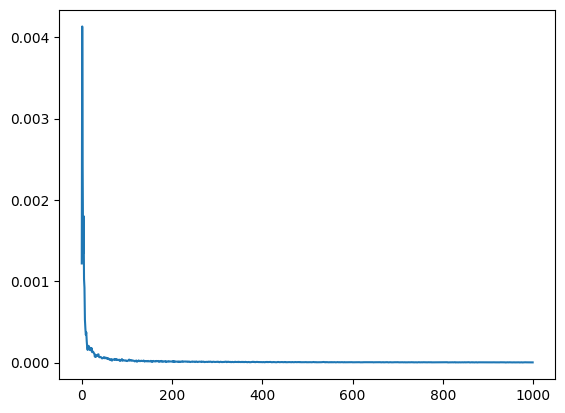

In [55]:
import matplotlib.pyplot as plt
plt.plot(history_simplex['gaps'])